**Date: 03.25.21**  

**Name: Subroto Singha**

In [95]:
#necessary imports
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import numpy as np
import seaborn as sns

from sklearn.metrics import accuracy_score

In [96]:
#raw dataset loading
df=pd.read_csv('FixationStatistics.txt', sep='\t', lineterminator='\r')
df.head(n=100)

,ParticipantID,TrialID,TrialIndex,SegmentID,SegmentIndex,StartTime(ms),EndTime(ms),Length(ms),StartTimestamp,EndTimestamp,StartTimeGMT,EndTimeGMT,ValidityRate,PageFixations,WindowFixations,PageBlinks,WindowBlinks,BottomWindowBound_Page,TopWindowBound_Page,BottomWindowBound_Session,TopWindowBound_Session,NumberOfReports,FirstReportType,FirstReportContent,FirstReportTimestamp,FirstReportTimesGMT,FirstReportSessionTime(ms),FirstReportTrialTime(ms),FirstReportSegmentTime(ms),FixDurN,FixDurMed,FixDurMean,FixDurSD,FixDurMin,FixDurMax,FixDurRange,FixDurSkew,FixDurKur,FxDisp,SacDurN,SacDurMed,SacDurMean,SacDurSD,SacDurMin,SacDurMax,SacDurRange,SacDurSkew,SacDurKur,SacAmpN,SacAmpMed,SacAmpMean,SacAmpSD,SacAmpMin,SacAmpMax,SacAmpRange,SacAmpSkew,SacAmpKur,SacAngAbsN,SacAngAbsMed,SacAngAbsMean,SacAngAbsSD,SacAngAbsMin,SacAngAbsMax,SacAngAbsRange,SacAngAbsSkew,SacAngAbsKur,SacAngRelN,SacAngRelMed,SacAngRelMean,SacAngRelSD,SacAngRelMin,SacAngRelMax,SacAngRelRange,SacAngRelSkew,SacAngRelKur,SacVelN,SacVelMed,SacVelMean,SacVelSD,SacVelMin,SacVelMax,SacVelRange,SacVelSkew,SacVelKur,horizontalSaccadeProp,FxSacRatio,BlinkDurN,BlinkDurMed,BlinkDurMean,BlinkDurSD,BlinkDurMin,BlinkDurMax,BlinkDurRange,BlinkDurSkew,BlinkDurKur,PupilDiametersZN,PupilDiametersZMed,PupilDiametersZMean,PupilDiametersZSD,PupilDiametersZMin,PupilDiametersZMax,PupilDiametersZRange,PupilDiametersZSkew,PupilDiametersZKur,FirstPassFixDurMean,FirstPassFixDurSD,FirstPassFixProp,EndOfClauseFixDurMean,EndOfClauseFixDurSD,EndOfClauseFixProp,RegFixDurMean,RegFixDurSD,RegFixProp,SingleFixDurMean,SingleFixDurSD,SingleFixProp,NoWordFixDurMean,NoWordFixDurSD,NoWordFixProp,GazeFixDurMean,GazeFixDurSD,GazeFixProp,WordSkipProp,propCrossLineSaccades,readingDepth,WordLenToFixDurCorr,FreqToFixDurCorr,NumSynsToFixDurCorr,HypDepthToFixDurCorr
0,\nBE7-P1002-Memphis,MainText,1.0,NaN,57.0,1294808.0,1322271.0,27463.0,1.382120e+12,1.382120e+12,46:38.0,47:05.5,0.873786,100.0,11.0,7.0,0.0,12650.0,16650.0,1307458.0,1311458.0,0.0,none,none,NaN,NaN,NaN,NaN,NaN,11.0,200.000000,221.000000,101.294620,83.0,366.0,283.000000,0.132989,-1.389706,0.429,10.0,17.000000,123.300000,162.960834,16.0,450.000000,434.0,1.244961,0.053705,10.000000,132.924202,210.010957,210.956418,80.856303,793.888636,713.032333,2.860900,8.535334,10.0,352.773596,232.045048,168.309166,0.289026,359.406308,359.117281,-0.725668,-1.670323,9.0,353.875658,240.549308,174.528607,4.791021,359.971189,355.180168,-0.857144,-1.710707,10.0,6.684761,5.484460,3.703560,0.407012,10.050112,9.643100,-0.457247,-1.396898,1.000000,1.972000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,-1.362156,-1.458751,0.415926,-2.365184,-0.868433,1.496751,-0.302367,-1.148603,261.0,102.0,0.55,NaN,NaN,0.0,NaN,NaN,0.00,290.0,83.0,0.45,164.0,80.0,0.55,163.0,89.0,0.45,0.636364,0.100000,153.0,-0.375,-0.223,0.404,-0.560
1,\nBE7-P1002-Memphis,MainText,1.0,NaN,56.0,1274590.0,1294808.0,20218.0,1.382120e+12,1.382120e+12,46:17.8,46:38.0,0.839242,72.0,11.0,4.0,0.0,12650.0,16650.0,1287240.0,1291240.0,0.0,none,none,NaN,NaN,NaN,NaN,NaN,11.0,183.000000,209.090909,107.757556,133.0,499.0,366.000000,2.241717,5.662505,0.436,10.0,25.500000,104.800000,145.311772,16.0,383.000000,367.0,1.609426,1.031941,10.000000,155.985073,274.138920,289.943023,66.923698,926.600337,859.676639,1.787491,2.228981,10.0,174.196626,179.839838,166.849182,2.679970,359.925463,357.245493,0.031703,-2.129207,9.0,351.088886,198.966328,183.765405,3.750852,359.611378,355.860527,-0.270329,-2.570038,10.0,4.602806,5.216583,3.525370,0.660415,11.163859,10.503445,0.681916,-0.361619,1.000000,2.195000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,-0.200080,-0.211293,0.297847,-0.938658,0.475580,1.414238,-0.449710,-0.030409,209.0,120.0,0.82,NaN,NaN,0.0,133.0,NaN,0.09,208.0,128.0,0.73,134.0,NaN,0.09,200.0,23.0,0.18,1.384615,0.200000,60.0,0.058,NaN,-0.078,-0.657
2,\nBE7-P1002-Memphis,MainText,1.0,NaN,55.0,1251125.0,1274590.0,23465.0,1.382120e+12,1.382120e+12,45:54.3,46:17.8,0.762784,73.0,13.0,4.0,0.0,12650.0,16650.0,1263775.0,1267775.0,0.0,no

In [97]:
#drop ID columns
df=df.drop(columns=['ParticipantID','TrialID','SegmentIndex','SegmentID','TrialIndex'])
df.head()

,StartTime(ms),EndTime(ms),Length(ms),StartTimestamp,EndTimestamp,StartTimeGMT,EndTimeGMT,ValidityRate,PageFixations,WindowFixations,PageBlinks,WindowBlinks,BottomWindowBound_Page,TopWindowBound_Page,BottomWindowBound_Session,TopWindowBound_Session,NumberOfReports,FirstReportType,FirstReportContent,FirstReportTimestamp,FirstReportTimesGMT,FirstReportSessionTime(ms),FirstReportTrialTime(ms),FirstReportSegmentTime(ms),FixDurN,FixDurMed,FixDurMean,FixDurSD,FixDurMin,FixDurMax,FixDurRange,FixDurSkew,FixDurKur,FxDisp,SacDurN,SacDurMed,SacDurMean,SacDurSD,SacDurMin,SacDurMax,SacDurRange,SacDurSkew,SacDurKur,SacAmpN,SacAmpMed,SacAmpMean,SacAmpSD,SacAmpMin,SacAmpMax,SacAmpRange,SacAmpSkew,SacAmpKur,SacAngAbsN,SacAngAbsMed,SacAngAbsMean,SacAngAbsSD,SacAngAbsMin,SacAngAbsMax,SacAngAbsRange,SacAngAbsSkew,SacAngAbsKur,SacAngRelN,SacAngRelMed,SacAngRelMean,SacAngRelSD,SacAngRelMin,SacAngRelMax,SacAngRelRange,SacAngRelSkew,SacAngRelKur,SacVelN,SacVelMed,SacVelMean,SacVelSD,SacVelMin,SacVelMax,SacVelRange,SacVelSkew,SacVelKur,horizontalSaccadeProp,FxSacRatio,BlinkDurN,BlinkDurMed,BlinkDurMean,BlinkDurSD,BlinkDurMin,BlinkDurMax,BlinkDurRange,BlinkDurSkew,BlinkDurKur,PupilDiametersZN,PupilDiametersZMed,PupilDiametersZMean,PupilDiametersZSD,PupilDiametersZMin,PupilDiametersZMax,PupilDiametersZRange,PupilDiametersZSkew,PupilDiametersZKur,FirstPassFixDurMean,FirstPassFixDurSD,FirstPassFixProp,EndOfClauseFixDurMean,EndOfClauseFixDurSD,EndOfClauseFixProp,RegFixDurMean,RegFixDurSD,RegFixProp,SingleFixDurMean,SingleFixDurSD,SingleFixProp,NoWordFixDurMean,NoWordFixDurSD,NoWordFixProp,GazeFixDurMean,GazeFixDurSD,GazeFixProp,WordSkipProp,propCrossLineSaccades,readingDepth,WordLenToFixDurCorr,FreqToFixDurCorr,NumSynsToFixDurCorr,HypDepthToFixDurCorr
0,1294808.0,1322271.0,27463.0,1.382120e+12,1.382120e+12,46:38.0,47:05.5,0.873786,100.0,11.0,7.0,0.0,12650.0,16650.0,1307458.0,1311458.0,0.0,none,none,NaN,NaN,NaN,NaN,NaN,11.0,200.0,221.000000,101.294620,83.0,366.0,283.0,0.132989,-1.389706,0.429,10.0,17.0,123.300000,162.960834,16.0,450.0,434.0,1.244961,0.053705,10.0,132.924202,210.010957,210.956418,80.856303,793.888636,713.032333,2.860900,8.535334,10.0,352.773596,232.045048,168.309166,0.289026,359.406308,359.117281,-0.725668,-1.670323,9.0,353.875658,240.549308,174.528607,4.791021,359.971189,355.180168,-0.857144,-1.710707,10.0,6.684761,5.484460,3.703560,0.407012,10.050112,9.643100,-0.457247,-1.396898,1.000000,1.972,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,-1.362156,-1.458751,0.415926,-2.365184,-0.868433,1.496751,-0.302367,-1.148603,261.0,102.0,0.55,NaN,NaN,0.0,NaN,NaN,0.00,290.0,83.0,0.45,164.0,80.0,0.55,163.0,89.0,0.45,0.636364,0.100000,153.0,-0.375,-0.223,0.404,-0.560
1,1274590.0,1294808.0,20218.0,1.382120e+12,1.382120e+12,46:17.8,46:38.0,0.839242,72.0,11.0,4.0,0.0,12650.0,16650.0,1287240.0,1291240.0,0.0,none,none,NaN,NaN,NaN,NaN,NaN,11.0,183.0,209.090909,107.757556,133.0,499.0,366.0,2.241717,5.662505,0.436,10.0,25.5,104.800000,145.311772,16.0,383.0,367.0,1.609426,1.031941,10.0,155.985073,274.138920,289.943023,66.923698,926.600337,859.676639,1.787491,2.228981,10.0,174.196626,179.839838,166.849182,2.679970,359.925463,357.245493,0.031703,-2.129207,9.0,351.088886,198.966328,183.765405,3.750852,359.611378,355.860527,-0.270329,-2.570038,10.0,4.602806,5.216583,3.525370,0.660415,11.163859,10.503445,0.681916,-0.361619,1.000000,2.195,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,-0.200080,-0.211293,0.297847,-0.938658,0.475580,1.414238,-0.449710,-0.030409,209.0,120.0,0.82,NaN,NaN,0.0,133.0,NaN,0.09,208.0,128.0,0.73,134.0,NaN,0.09,200.0,23.0,0.18,1.384615,0.200000,60.0,0.058,NaN,-0.078,-0.657
2,1251125.0,1274590.0,23465.0,1.382120e+12,1.382120e+12,45:54.3,46:17.8,0.762784,73.0,13.0,4.0,0.0,12650.0,16650.0,1263775.0,1267775.0,0.0,none,none,NaN,NaN,NaN,NaN,NaN,13.0,167.0,188.538462,100.261006,83.0,416.0,333.0,1.010131,0.510088,0.554,12.0,42.0,120.500000,158.185449,16.0,466.0,450.0,1.434272,0.694127,12.0,118.155517,256.603244,288.874145,66.587272,887.889747,821.302475,1.815159,

In [98]:
df=df.fillna(0)

In [99]:
#Global Features
#All Found Global Features Except Saccade Distance, Number of Saccades, Fixation Dispersion and Blink Count
X_Global_Features=df[['FixDurN','FixDurMed','FixDurSD','FixDurMin','FixDurMax','FixDurRange','FixDurSkew','FixDurKur','FxDisp','SacDurN','SacDurMed','SacDurMean','SacDurSD','SacDurMin','SacDurMax','SacDurRange','SacDurSkew','SacDurKur','SacAngAbsN','SacAngAbsMed','SacAngAbsMean','SacAngAbsSD','SacAngAbsMin','SacAngAbsMax','SacAngAbsRange','SacAngAbsSkew','SacAngAbsKur','PupilDiametersZN','PupilDiametersZMed','PupilDiametersZMean','PupilDiametersZSD','PupilDiametersZMin','PupilDiametersZMax','PupilDiametersZRange','PupilDiametersZSkew','PupilDiametersZKur','horizontalSaccadeProp','FxSacRatio','BlinkDurN','BlinkDurMed','BlinkDurMean','BlinkDurSD','BlinkDurMin','BlinkDurMax','BlinkDurRange','BlinkDurSkew','BlinkDurKur']]

In [100]:
df.loc[df['NumberOfReports'] ==0.0, 'NumberOfReports_new'] = 0.0 
df.loc[df['NumberOfReports'] >=1.0 , 'NumberOfReports_new'] = 1.0

In [101]:
df.head()

,StartTime(ms),EndTime(ms),Length(ms),StartTimestamp,EndTimestamp,StartTimeGMT,EndTimeGMT,ValidityRate,PageFixations,WindowFixations,PageBlinks,WindowBlinks,BottomWindowBound_Page,TopWindowBound_Page,BottomWindowBound_Session,TopWindowBound_Session,NumberOfReports,FirstReportType,FirstReportContent,FirstReportTimestamp,FirstReportTimesGMT,FirstReportSessionTime(ms),FirstReportTrialTime(ms),FirstReportSegmentTime(ms),FixDurN,FixDurMed,FixDurMean,FixDurSD,FixDurMin,FixDurMax,FixDurRange,FixDurSkew,FixDurKur,FxDisp,SacDurN,SacDurMed,SacDurMean,SacDurSD,SacDurMin,SacDurMax,SacDurRange,SacDurSkew,SacDurKur,SacAmpN,SacAmpMed,SacAmpMean,SacAmpSD,SacAmpMin,SacAmpMax,SacAmpRange,SacAmpSkew,SacAmpKur,SacAngAbsN,SacAngAbsMed,SacAngAbsMean,SacAngAbsSD,SacAngAbsMin,SacAngAbsMax,SacAngAbsRange,SacAngAbsSkew,SacAngAbsKur,SacAngRelN,SacAngRelMed,SacAngRelMean,SacAngRelSD,SacAngRelMin,SacAngRelMax,SacAngRelRange,SacAngRelSkew,SacAngRelKur,SacVelN,SacVelMed,SacVelMean,SacVelSD,SacVelMin,SacVelMax,SacVelRange,SacVelSkew,SacVelKur,horizontalSaccadeProp,FxSacRatio,BlinkDurN,BlinkDurMed,BlinkDurMean,BlinkDurSD,BlinkDurMin,BlinkDurMax,BlinkDurRange,BlinkDurSkew,BlinkDurKur,PupilDiametersZN,PupilDiametersZMed,PupilDiametersZMean,PupilDiametersZSD,PupilDiametersZMin,PupilDiametersZMax,PupilDiametersZRange,PupilDiametersZSkew,PupilDiametersZKur,FirstPassFixDurMean,FirstPassFixDurSD,FirstPassFixProp,EndOfClauseFixDurMean,EndOfClauseFixDurSD,EndOfClauseFixProp,RegFixDurMean,RegFixDurSD,RegFixProp,SingleFixDurMean,SingleFixDurSD,SingleFixProp,NoWordFixDurMean,NoWordFixDurSD,NoWordFixProp,GazeFixDurMean,GazeFixDurSD,GazeFixProp,WordSkipProp,propCrossLineSaccades,readingDepth,WordLenToFixDurCorr,FreqToFixDurCorr,NumSynsToFixDurCorr,HypDepthToFixDurCorr,NumberOfReports_new
0,1294808.0,1322271.0,27463.0,1.382120e+12,1.382120e+12,46:38.0,47:05.5,0.873786,100.0,11.0,7.0,0.0,12650.0,16650.0,1307458.0,1311458.0,0.0,none,none,0.000000e+00,0.0,0.0,0.0,0.0,11.0,200.0,221.000000,101.294620,83.0,366.0,283.0,0.132989,-1.389706,0.429,10.0,17.0,123.300000,162.960834,16.0,450.0,434.0,1.244961,0.053705,10.0,132.924202,210.010957,210.956418,80.856303,793.888636,713.032333,2.860900,8.535334,10.0,352.773596,232.045048,168.309166,0.289026,359.406308,359.117281,-0.725668,-1.670323,9.0,353.875658,240.549308,174.528607,4.791021,359.971189,355.180168,-0.857144,-1.710707,10.0,6.684761,5.484460,3.703560,0.407012,10.050112,9.643100,-0.457247,-1.396898,1.000000,1.972,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,38.0,-1.362156,-1.458751,0.415926,-2.365184,-0.868433,1.496751,-0.302367,-1.148603,261.0,102.0,0.55,0.0,0.0,0.0,0.0,0.0,0.00,290.0,83.0,0.45,164.0,80.0,0.55,163.0,89.0,0.45,0.636364,0.100000,153.0,-0.375,-0.223,0.404,-0.560,0.0
1,1274590.0,1294808.0,20218.0,1.382120e+12,1.382120e+12,46:17.8,46:38.0,0.839242,72.0,11.0,4.0,0.0,12650.0,16650.0,1287240.0,1291240.0,0.0,none,none,0.000000e+00,0.0,0.0,0.0,0.0,11.0,183.0,209.090909,107.757556,133.0,499.0,366.0,2.241717,5.662505,0.436,10.0,25.5,104.800000,145.311772,16.0,383.0,367.0,1.609426,1.031941,10.0,155.985073,274.138920,289.943023,66.923698,926.600337,859.676639,1.787491,2.228981,10.0,174.196626,179.839838,166.849182,2.679970,359.925463,357.245493,0.031703,-2.129207,9.0,351.088886,198.966328,183.765405,3.750852,359.611378,355.860527,-0.270329,-2.570038,10.0,4.602806,5.216583,3.525370,0.660415,11.163859,10.503445,0.681916,-0.361619,1.000000,2.195,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,71.0,-0.200080,-0.211293,0.297847,-0.938658,0.475580,1.414238,-0.449710,-0.030409,209.0,120.0,0.82,0.0,0.0,0.0,133.0,0.0,0.09,208.0,128.0,0.73,134.0,0.0,0.09,200.0,23.0,0.18,1.384615,0.200000,60.0,0.058,0.000,-0.078,-0.657,0.0
2,1251125.0,1274590.0,23465.0,1.382120e+12,1.382120e+12,45:54.3,46:17.8,0.762784,73.0,13.0,4.0,0.0,12650.0,16650.0,1263775.0,1267775.0,0.0,none,none,0.000000e+00,0.0,0.0,0.0,0.0,13.0,167.0,188.538462,100.261006,83.0,416.0,333.0,1.010131,0.510088,0.554,12.0,42.0,120.500000,158.185449,16.0,466.0,450.0,1.434272,0

In [102]:
y=df['NumberOfReports_new'].fillna(0)
y.shape

(4077,)

In [103]:
RSEED = 50

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_Global_Features, y, test_size=0.20, random_state= RSEED,stratify = y)

In [104]:
print(x_train.shape)
print(x_test.shape)

(3261, 47)
(816, 47)


In [105]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [106]:
print(x_train.isnull().sum().sum())
print(x_test.isnull().sum().sum())

0
0


In [107]:
# Imputation of missing values
#x_train = x_train.fillna(x_train.mean())
#x_test = x_test.fillna(x_test.mean())

# Upsample minority class

In [108]:
from sklearn.utils import resample
# concatenate our training data back together
X = pd.concat([x_train, y_train], axis=1)
# separate minority and majority classes
not_attention = X[X.NumberOfReports_new==0]
attention = X[X.NumberOfReports_new==1]

# upsample minority
attention_upsampled = resample(attention,
                          replace=True, # sample with replacement
                          n_samples=len(not_attention), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_attention, attention_upsampled])

# check new class counts
upsampled.NumberOfReports_new.value_counts()

1.0    2371
0.0    2371
Name: NumberOfReports_new, dtype: int64

In [109]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.NumberOfReports_new
x_train = upsampled.drop('NumberOfReports_new', axis=1)

In [110]:
print(sum(y_train==0.0))
print(sum(y_train==1.0))

2371
2371


In [111]:
x_train.head()

,FixDurN,FixDurMed,FixDurSD,FixDurMin,FixDurMax,FixDurRange,FixDurSkew,FixDurKur,FxDisp,SacDurN,SacDurMed,SacDurMean,SacDurSD,SacDurMin,SacDurMax,SacDurRange,SacDurSkew,SacDurKur,SacAngAbsN,SacAngAbsMed,SacAngAbsMean,SacAngAbsSD,SacAngAbsMin,SacAngAbsMax,SacAngAbsRange,SacAngAbsSkew,SacAngAbsKur,PupilDiametersZN,PupilDiametersZMed,PupilDiametersZMean,PupilDiametersZSD,PupilDiametersZMin,PupilDiametersZMax,PupilDiametersZRange,PupilDiametersZSkew,PupilDiametersZKur,horizontalSaccadeProp,FxSacRatio,BlinkDurN,BlinkDurMed,BlinkDurMean,BlinkDurSD,BlinkDurMin,BlinkDurMax,BlinkDurRange,BlinkDurSkew,BlinkDurKur
2571,13.0,216.000000,105.912397,125.0,425.0,300.0,0.965454,-0.426877,0.459,12.0,29.0,31.916667,13.069453,9.0,59.0,50.0,0.582629,0.920747,12.0,184.743894,222.213804,134.144088,0.100160,359.337393,359.237233,-0.469997,-0.889539,443.0,-1.350853,-1.442104,0.497326,-2.530275,-0.265565,2.264710,-0.206439,-0.924401,1.000000,8.266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
403,13.0,217.000000,116.399180,100.0,433.0,333.0,0.544530,-0.917120,0.461,12.0,58.0,62.250000,48.181711,16.0,199.0,183.0,2.259127,6.510097,12.0,180.031407,182.535299,148.772532,0.280437,359.250486,358.970048,-0.015374,-1.650138,124.0,1.071576,1.025636,0.609553,0.125141,2.248275,2.123134,0.223773,-1.310523,1.000000,3.993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3195,11.0,279.012886,97.559679,158.0,409.0,251.0,0.044313,-2.041656,0.479,10.0,17.0,30.700000,25.060150,8.0,75.0,67.0,1.084916,-0.764756,10.0,91.052619,143.750800,162.438148,0.886835,359.441332,358.554497,0.502430,-1.765124,364.0,-1.289033,-1.302612,0.317515,-2.279180,-0.546339,1.732841,-0.372285,-0.086661,1.000000,9.857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3364,13.0,192.000000,111.184877,108.0,533.0,425.0,1.982336,5.109880,0.503,12.0,25.0,65.916667,80.376906,8.0,250.0,242.0,1.647236,1.705912,12.0,339.342975,236.385120,154.844802,2.022511,359.319431,357.296920,-0.767055,-1.303693,334.0,0.070752,-0.043485,0.275187,-0.644413,0.457875,1.102289,-0.540473,-1.034852,0.916667,3.614,1.0,133.0,133.0,0.0,133.0,133.0,0.0,0.0,0.0
2337,12.0,183.500000,100.393280,117.0,400.0,283.0,0.680477,-1.157862,0.420,11.0,66.0,61.909091,42.108086,16.0,166.0,150.0,1.488981,3.281286,11.0,177.857150,163.396371,146.466043,1.015344,359.839943,358.824599,0.183695,-1.487374,172.0,-0.443247,-0.305986,0.409561,-0.927295,0.970678,1.897973,0.968101,0.129502,1.000000,4.087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression
upsampled1 = LogisticRegression().fit(x_train, y_train)

upsampled_pred = upsampled1.predict(x_test)

/Users/subrotosingha/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
# Checking accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(y_test, upsampled_pred))

Accuracy:  0.571078431372549


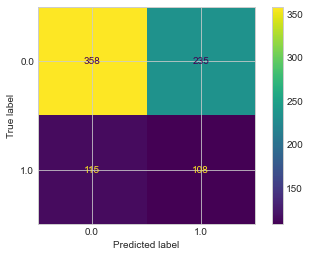

In [114]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 
plot_confusion_matrix(upsampled1, x_test, y_test)
plt.show()

# RandomForest

In [115]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=15).fit(x_train, y_train)

# predict on test set
rfc_pred = rfc.predict(x_test)

print("Accuracy: ",accuracy_score(y_test, rfc_pred))

Accuracy:  0.7132352941176471


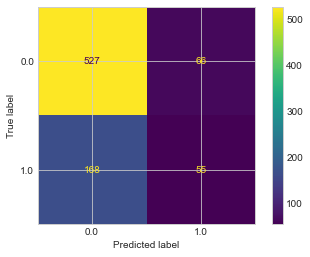

In [116]:
plot_confusion_matrix(rfc, x_test, y_test)
plt.show()

# XGBoost

In [117]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=0,learning_rate=0.04)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/Users/subrotosingha/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:40:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 69.24%


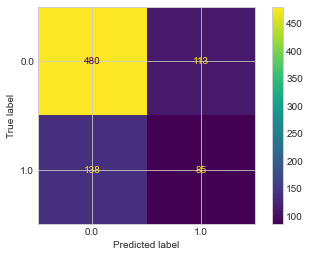

In [118]:
plot_confusion_matrix(model, x_test, y_test)
plt.show()

# Neural Network

In [119]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [120]:
input_shape = [x_train.shape[1]]

# model
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(1,activation='sigmoid'),
])

In [121]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_27 (Batc (None, 47)                188       
_________________________________________________________________
dense_31 (Dense)             (None, 512)               24576     
_________________________________________________________________
batch_normalization_28 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_29 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)             

In [122]:
#ADAM
model.compile(optimizer='ADAM',loss='binary_crossentropy',metrics=['binary_accuracy'])

Epoch 1/200
10/10 [==============================] - 1s 32ms/step - loss: 0.8757 - binary_accuracy: 0.5438 - val_loss: 2.0240 - val_binary_accuracy: 0.2733
Epoch 2/200
10/10 [==============================] - 0s 13ms/step - loss: 0.7360 - binary_accuracy: 0.6097 - val_loss: 0.8695 - val_binary_accuracy: 0.3885
Epoch 3/200
10/10 [==============================] - 0s 12ms/step - loss: 0.6749 - binary_accuracy: 0.6440 - val_loss: 1.5470 - val_binary_accuracy: 0.2745
Epoch 4/200
10/10 [==============================] - 0s 12ms/step - loss: 0.6484 - binary_accuracy: 0.6460 - val_loss: 1.5938 - val_binary_accuracy: 0.2733
Epoch 5/200
10/10 [==============================] - 0s 12ms/step - loss: 0.6285 - binary_accuracy: 0.6684 - val_loss: 1.3258 - val_binary_accuracy: 0.2745
Epoch 6/200
10/10 [==============================] - 0s 12ms/step - loss: 0.6051 - binary_accuracy: 0.6839 - val_loss: 1.1887 - val_binary_accuracy: 0.2745
Epoch 7/200
10/10 [==============================] - 0s 12ms/ste

<AxesSubplot:title={'center':'Accuracy'}>

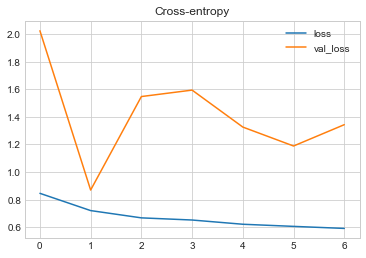

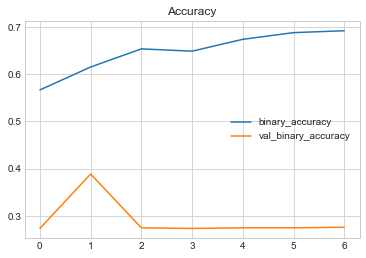

In [123]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

Epoch 1/200
10/10 [==============================] - 1s 25ms/step - loss: 1.0267 - binary_accuracy: 0.5290 - val_loss: 5.7080 - val_binary_accuracy: 0.2733
Epoch 2/200
10/10 [==============================] - 0s 12ms/step - loss: 0.6999 - binary_accuracy: 0.6310 - val_loss: 3.2623 - val_binary_accuracy: 0.2733
Epoch 3/200
10/10 [==============================] - 0s 13ms/step - loss: 0.6773 - binary_accuracy: 0.6384 - val_loss: 2.5935 - val_binary_accuracy: 0.2733
Epoch 4/200
10/10 [==============================] - 0s 13ms/step - loss: 0.6676 - binary_accuracy: 0.6568 - val_loss: 2.5914 - val_binary_accuracy: 0.2733
Epoch 5/200
10/10 [==============================] - 0s 12ms/step - loss: 0.6217 - binary_accuracy: 0.6673 - val_loss: 2.0596 - val_binary_accuracy: 0.2733
Epoch 6/200
10/10 [==============================] - 0s 12ms/step - loss: 0.6093 - binary_accuracy: 0.6921 - val_loss: 1.7307 - val_binary_accuracy: 0.2745
Epoch 7/200
10/10 [==============================] - 0s 12ms/ste

<AxesSubplot:title={'center':'Accuracy'}>

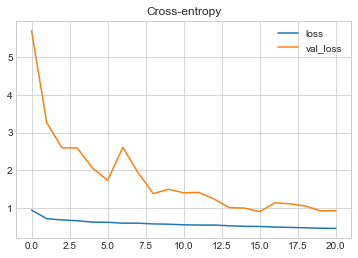

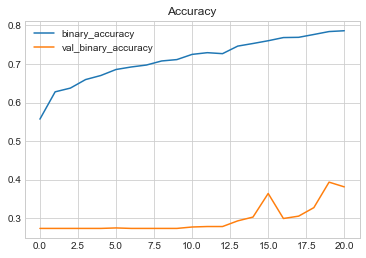

In [124]:
# RMSProp
# model
model1 = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(1,activation='sigmoid'),
])

model1.compile(optimizer='RMSProp',loss='binary_crossentropy',metrics=['binary_accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model1.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

Epoch 1/200
10/10 [==============================] - 1s 25ms/step - loss: 0.9458 - binary_accuracy: 0.4947 - val_loss: 2.0468 - val_binary_accuracy: 0.2733
Epoch 2/200
10/10 [==============================] - 0s 10ms/step - loss: 0.8346 - binary_accuracy: 0.5363 - val_loss: 1.7227 - val_binary_accuracy: 0.2733
Epoch 3/200
10/10 [==============================] - 0s 10ms/step - loss: 0.7846 - binary_accuracy: 0.5741 - val_loss: 1.5683 - val_binary_accuracy: 0.2733
Epoch 4/200
10/10 [==============================] - 0s 10ms/step - loss: 0.7862 - binary_accuracy: 0.5627 - val_loss: 1.4185 - val_binary_accuracy: 0.2733
Epoch 5/200
10/10 [==============================] - 0s 10ms/step - loss: 0.7809 - binary_accuracy: 0.5700 - val_loss: 1.2866 - val_binary_accuracy: 0.2745
Epoch 6/200
10/10 [==============================] - 0s 11ms/step - loss: 0.7709 - binary_accuracy: 0.5711 - val_loss: 1.1563 - val_binary_accuracy: 0.2745
Epoch 7/200
10/10 [==============================] - 0s 10ms/ste

<AxesSubplot:title={'center':'Accuracy'}>

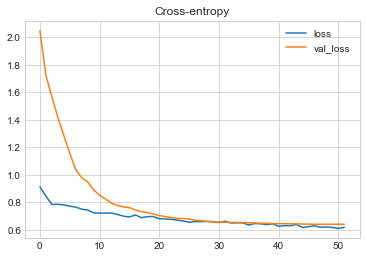

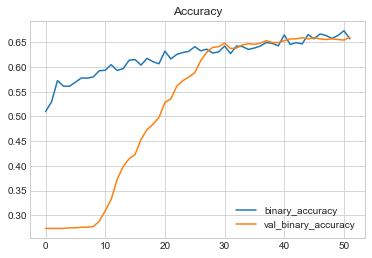

In [125]:
# SGD
# model
model1 = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(1,activation='sigmoid'),
])

model1.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['binary_accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model1.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

# Undersample majority class

In [126]:
# still using our separated classes attention and not_attention from above

# downsample majority
not_attention_downsampled = resample(not_attention,
                                replace = False, # sample without replacement
                                n_samples = len(attention), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_attention_downsampled, attention])

# checking counts
downsampled.NumberOfReports_new.value_counts()

1.0    890
0.0    890
Name: NumberOfReports_new, dtype: int64

In [127]:
# trying logistic regression again with the undersampled dataset

y_train = downsampled.NumberOfReports_new
x_train = downsampled.drop('NumberOfReports_new', axis=1)

In [128]:
print(sum(y_train==0.0))
print(sum(y_train==1.0))

890
890


# Logistic Regression

In [129]:
undersampled = LogisticRegression(max_iter=1000).fit(x_train, y_train)

undersampled_pred = undersampled.predict(x_test)

# Checking accuracy and others
print("Accuracy: ",accuracy_score(y_test, undersampled_pred))

Accuracy:  0.6041666666666666


/Users/subrotosingha/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


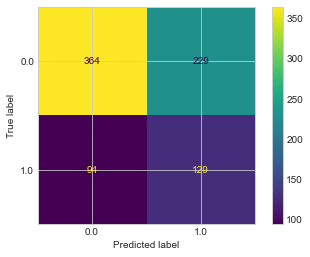

In [130]:
plot_confusion_matrix(undersampled, x_test, y_test)
plt.show()

# RandomForest

In [131]:

# train model
rfc = RandomForestClassifier(n_estimators=15).fit(x_train, y_train)

# predict on test set
rfc_pred = rfc.predict(x_test)

print("Accuracy: ",accuracy_score(y_test, rfc_pred))

Accuracy:  0.5637254901960784


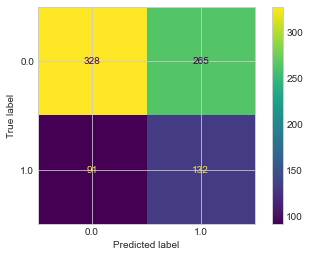

In [132]:
plot_confusion_matrix(rfc, x_test, y_test)
plt.show()

# XGBoost

In [133]:
model = XGBClassifier(random_state=0,learning_rate=0.04)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[12:40:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/subrotosingha/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 60.78%


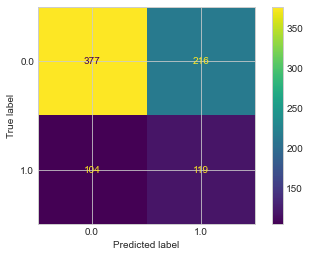

In [134]:
plot_confusion_matrix(model, x_test, y_test)
plt.show()

# Neural Network

In [135]:
input_shape = [x_train.shape[1]]

# model
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(1,activation='sigmoid'),
])

In [136]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_36 (Batc (None, 47)                188       
_________________________________________________________________
dense_40 (Dense)             (None, 512)               24576     
_________________________________________________________________
batch_normalization_37 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_24 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_38 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)             

In [137]:
#ADAM
model.compile(optimizer='ADAM',loss='binary_crossentropy',metrics=['binary_accuracy'])

Epoch 1/200
4/4 [==============================] - 1s 62ms/step - loss: 0.8995 - binary_accuracy: 0.5416 - val_loss: 2.8024 - val_binary_accuracy: 0.2745
Epoch 2/200
4/4 [==============================] - 0s 17ms/step - loss: 0.7670 - binary_accuracy: 0.5861 - val_loss: 1.6789 - val_binary_accuracy: 0.2733
Epoch 3/200
4/4 [==============================] - 0s 19ms/step - loss: 0.7254 - binary_accuracy: 0.6080 - val_loss: 1.5702 - val_binary_accuracy: 0.2745
Epoch 4/200
4/4 [==============================] - 0s 20ms/step - loss: 0.6658 - binary_accuracy: 0.6429 - val_loss: 1.2870 - val_binary_accuracy: 0.2843
Epoch 5/200
4/4 [==============================] - 0s 19ms/step - loss: 0.6718 - binary_accuracy: 0.6556 - val_loss: 1.2384 - val_binary_accuracy: 0.2782
Epoch 6/200
4/4 [==============================] - 0s 20ms/step - loss: 0.6203 - binary_accuracy: 0.6688 - val_loss: 1.4186 - val_binary_accuracy: 0.2733
Epoch 7/200
4/4 [==============================] - 0s 19ms/step - loss: 0.62

<AxesSubplot:title={'center':'Accuracy'}>

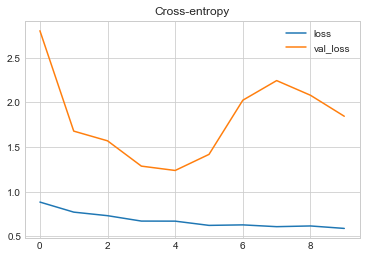

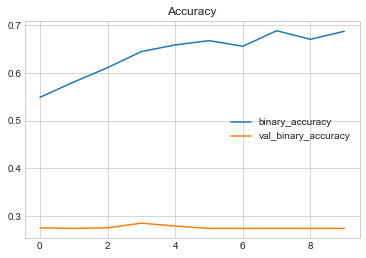

In [138]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

Epoch 1/200
4/4 [==============================] - 1s 74ms/step - loss: 0.9965 - binary_accuracy: 0.5249 - val_loss: 6.0962 - val_binary_accuracy: 0.2733
Epoch 2/200
4/4 [==============================] - 0s 22ms/step - loss: 0.7675 - binary_accuracy: 0.5907 - val_loss: 3.4373 - val_binary_accuracy: 0.2757
Epoch 3/200
4/4 [==============================] - 0s 22ms/step - loss: 0.7457 - binary_accuracy: 0.6010 - val_loss: 3.9308 - val_binary_accuracy: 0.2733
Epoch 4/200
4/4 [==============================] - 0s 21ms/step - loss: 0.6667 - binary_accuracy: 0.6296 - val_loss: 2.5100 - val_binary_accuracy: 0.2733
Epoch 5/200
4/4 [==============================] - 0s 22ms/step - loss: 0.6664 - binary_accuracy: 0.6351 - val_loss: 2.8946 - val_binary_accuracy: 0.2733
Epoch 6/200
4/4 [==============================] - 0s 21ms/step - loss: 0.6741 - binary_accuracy: 0.6412 - val_loss: 3.1538 - val_binary_accuracy: 0.2733
Epoch 7/200
4/4 [==============================] - 0s 19ms/step - loss: 0.64

<AxesSubplot:title={'center':'Accuracy'}>

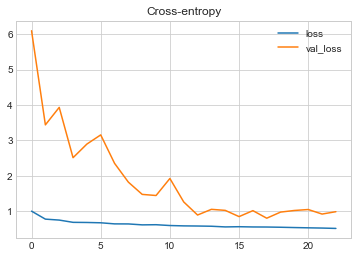

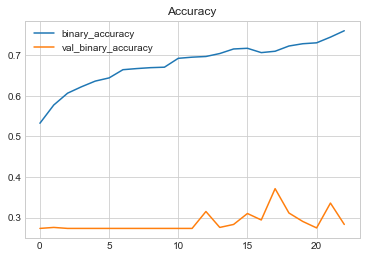

In [139]:
# RMSProp
# model
model1 = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(1,activation='sigmoid'),
])

model1.compile(optimizer='RMSProp',loss='binary_crossentropy',metrics=['binary_accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model1.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

Epoch 1/200
4/4 [==============================] - 1s 78ms/step - loss: 0.9266 - binary_accuracy: 0.4917 - val_loss: 1.0624 - val_binary_accuracy: 0.2978
Epoch 2/200
4/4 [==============================] - 0s 20ms/step - loss: 0.8993 - binary_accuracy: 0.5077 - val_loss: 1.0304 - val_binary_accuracy: 0.2855
Epoch 3/200
4/4 [==============================] - 0s 22ms/step - loss: 0.8792 - binary_accuracy: 0.5352 - val_loss: 1.0392 - val_binary_accuracy: 0.2819
Epoch 4/200
4/4 [==============================] - 0s 21ms/step - loss: 0.8687 - binary_accuracy: 0.5344 - val_loss: 1.0575 - val_binary_accuracy: 0.2757
Epoch 5/200
4/4 [==============================] - 0s 22ms/step - loss: 0.8494 - binary_accuracy: 0.5600 - val_loss: 1.0280 - val_binary_accuracy: 0.2782
Epoch 6/200
4/4 [==============================] - 0s 22ms/step - loss: 0.8736 - binary_accuracy: 0.5369 - val_loss: 0.9821 - val_binary_accuracy: 0.2843
Epoch 7/200
4/4 [==============================] - 0s 21ms/step - loss: 0.80

<AxesSubplot:title={'center':'Accuracy'}>

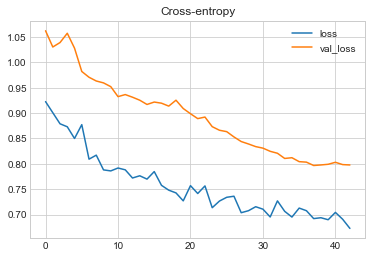

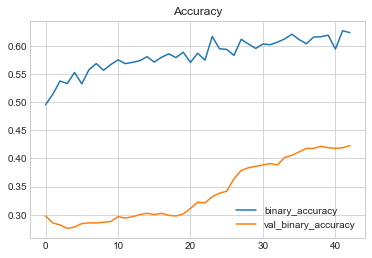

In [140]:
# SGD
# model
model1 = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(1,activation='sigmoid'),
])

model1.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['binary_accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model1.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

# Data Reshape for LSTM,GRU Implementation

In [141]:
x_train = x_train.to_numpy()
x_train=x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1780, 47, 1)

In [142]:
x_test = x_test.to_numpy()
x_test=x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(816, 47, 1)

# LSTM Model

In [143]:
# Importing the Keras libraries and packages for LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow import keras
from tensorflow.keras.layers import concatenate
from tensorflow.keras.activations import swish

In [144]:
inputs = keras.Input(shape=(x_train.shape[1], 1), name="input_layer")

#First block of lstm and dense
#lstm layers
lstm_1 = LSTM(128, return_sequences=True, name="lstm11")(inputs)
lstm_2 = LSTM(64, return_sequences=False, name="lstm22")(lstm_1)
#dense layers
dense_1 = Dense(128, activation="relu", name="dense11")(lstm_2)
dense_2 = Dense(64, activation="relu", name="dense22")(dense_1)
#flat1 = Flatten()(dense_2)

#Second block of lstm and dense
#lstm layers
lstm_3 = LSTM(128, return_sequences=True, name="lstm33")(inputs)
lstm_4 = LSTM(64, return_sequences=False, name="lstm44")(lstm_3)
#dense layers
dense_3 = Dense(128, activation="swish", name="dense33")(lstm_4)
dense_4 = Dense(64, activation="swish", name="dense44")(dense_3)
#flat2 = Flatten()(dense_4)


#concatenate layer
merge = concatenate([dense_2, dense_4])

# interpretation layer
hidden1 = Dense(10, activation='relu')(merge)

#Output layer
outputs = Dense(1, activation='sigmoid', name="output")(hidden1)
model = keras.Model(inputs=inputs, outputs=outputs,name="lstm_model11")

model.summary()

Model: "lstm_model11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 47, 1)]      0                                            
__________________________________________________________________________________________________
lstm11 (LSTM)                   (None, 47, 128)      66560       input_layer[0][0]                
__________________________________________________________________________________________________
lstm33 (LSTM)                   (None, 47, 128)      66560       input_layer[0][0]                
__________________________________________________________________________________________________
lstm22 (LSTM)                   (None, 64)           49408       lstm11[0][0]                     
_______________________________________________________________________________________

In [145]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [146]:
# Compiling the LSTM
model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics=['accuracy'])

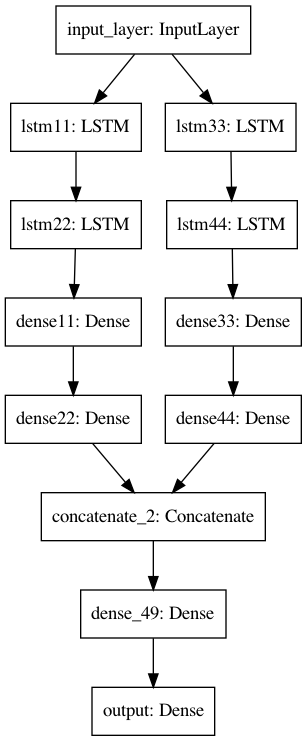

In [147]:
keras.utils.plot_model(model, "my_first_model.png")

In [148]:
# Fitting the LSTM to the Training set
model.fit(x_train, y_train, batch_size = 20, epochs = 20, verbose = 1,validation_data=(x_test, y_test))

Epoch 1/20
89/89 [==============================] - 8s 51ms/step - loss: 0.6944 - accuracy: 0.5140 - val_loss: 0.7021 - val_accuracy: 0.4902
Epoch 2/20
89/89 [==============================] - 3s 32ms/step - loss: 0.6938 - accuracy: 0.5237 - val_loss: 0.7361 - val_accuracy: 0.2733
Epoch 3/20
89/89 [==============================] - 3s 32ms/step - loss: 0.6943 - accuracy: 0.4982 - val_loss: 0.7006 - val_accuracy: 0.2868
Epoch 4/20
89/89 [==============================] - 3s 32ms/step - loss: 0.6931 - accuracy: 0.5171 - val_loss: 0.6934 - val_accuracy: 0.5086
Epoch 5/20
89/89 [==============================] - 3s 32ms/step - loss: 0.6925 - accuracy: 0.5305 - val_loss: 0.6995 - val_accuracy: 0.4032
Epoch 6/20
89/89 [==============================] - 3s 32ms/step - loss: 0.6933 - accuracy: 0.5206 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 7/20
89/89 [==============================] - 3s 32ms/step - loss: 0.6927 - accuracy: 0.5308 - val_loss: 0.7040 - val_accuracy: 0.3909
Epoch 8/20
89

In [149]:
opt = tensorflow.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics=['accuracy'])

In [150]:
# Fitting the LSTM to the Training set
model.fit(x_train, y_train, batch_size = 64, epochs = 20, verbose = 1,validation_data=(x_test, y_test))

Epoch 1/20
28/28 [==============================] - 7s 113ms/step - loss: 0.6930 - accuracy: 0.5055 - val_loss: 0.6918 - val_accuracy: 0.5086
Epoch 2/20
28/28 [==============================] - 2s 74ms/step - loss: 0.6919 - accuracy: 0.5306 - val_loss: 0.6925 - val_accuracy: 0.5086
Epoch 3/20
28/28 [==============================] - 2s 77ms/step - loss: 0.6920 - accuracy: 0.5276 - val_loss: 0.6930 - val_accuracy: 0.5086
Epoch 4/20
28/28 [==============================] - 2s 77ms/step - loss: 0.6927 - accuracy: 0.5149 - val_loss: 0.6934 - val_accuracy: 0.5086
Epoch 5/20
28/28 [==============================] - 2s 76ms/step - loss: 0.6922 - accuracy: 0.5205 - val_loss: 0.6940 - val_accuracy: 0.5086
Epoch 6/20
28/28 [==============================] - 2s 75ms/step - loss: 0.6923 - accuracy: 0.5187 - val_loss: 0.6946 - val_accuracy: 0.5086
Epoch 7/20
28/28 [==============================] - 2s 74ms/step - loss: 0.6917 - accuracy: 0.5295 - val_loss: 0.6947 - val_accuracy: 0.5086
Epoch 8/20
2

In [151]:
opt=tensorflow.keras.optimizers.Adagrad(learning_rate=0.0001)
model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics=['accuracy'])

In [152]:
# Fitting the LSTM to the Training set
model.fit(x_train, y_train, batch_size = 64, epochs = 20, verbose = 1,validation_data=(x_test, y_test))

Epoch 1/20
28/28 [==============================] - 7s 112ms/step - loss: 0.6887 - accuracy: 0.5702 - val_loss: 0.7006 - val_accuracy: 0.4841
Epoch 2/20
28/28 [==============================] - 2s 80ms/step - loss: 0.6891 - accuracy: 0.5613 - val_loss: 0.7006 - val_accuracy: 0.4841
Epoch 3/20
28/28 [==============================] - 2s 77ms/step - loss: 0.6875 - accuracy: 0.5720 - val_loss: 0.7007 - val_accuracy: 0.4841
Epoch 4/20
28/28 [==============================] - 2s 78ms/step - loss: 0.6868 - accuracy: 0.5726 - val_loss: 0.7007 - val_accuracy: 0.4828
Epoch 5/20
28/28 [==============================] - 2s 74ms/step - loss: 0.6879 - accuracy: 0.5635 - val_loss: 0.7007 - val_accuracy: 0.4828
Epoch 6/20
28/28 [==============================] - 2s 75ms/step - loss: 0.6896 - accuracy: 0.5533 - val_loss: 0.7007 - val_accuracy: 0.4828
Epoch 7/20
28/28 [==============================] - 2s 75ms/step - loss: 0.6881 - accuracy: 0.5574 - val_loss: 0.7007 - val_accuracy: 0.4828
Epoch 8/20
2

# GRU Model

In [153]:
from tensorflow.keras.layers import GRU
from tensorflow.keras.activations import swish

In [154]:
# Initialising the Sequential Model
model1 = Sequential()
# Adding the input layer and the GRU layer
model1.add(GRU(units = 32, activation = 'swish',recurrent_activation='sigmoid',recurrent_dropout=0.02,unroll=False,return_sequences=True, input_shape = (x_train.shape[1], 1)))
# Adding the output layer
model1.add(Dense(units = 1,activation='sigmoid'))

In [155]:
# Compiling the GRU
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

In [156]:
# Fitting the GRU to the Training set
model1.fit(x_train, y_train, batch_size = 20, epochs = 20, verbose = 1,validation_data=(x_test, y_test))

Epoch 1/20
89/89 [==============================] - 3s 16ms/step - loss: 3.4408 - accuracy: 0.4889 - val_loss: 1.4016 - val_accuracy: 0.4809
Epoch 2/20
89/89 [==============================] - 1s 13ms/step - loss: 1.3885 - accuracy: 0.4958 - val_loss: 1.1127 - val_accuracy: 0.4272
Epoch 3/20
89/89 [==============================] - 1s 14ms/step - loss: 1.0104 - accuracy: 0.5017 - val_loss: 0.8576 - val_accuracy: 0.4698
Epoch 4/20
89/89 [==============================] - 1s 13ms/step - loss: 0.8396 - accuracy: 0.5072 - val_loss: 0.7213 - val_accuracy: 0.5497
Epoch 5/20
89/89 [==============================] - 1s 13ms/step - loss: 0.7778 - accuracy: 0.5056 - val_loss: 0.7158 - val_accuracy: 0.5181
Epoch 6/20
89/89 [==============================] - 1s 13ms/step - loss: 0.7605 - accuracy: 0.5079 - val_loss: 0.6624 - val_accuracy: 0.6035
Epoch 7/20
89/89 [==============================] - 1s 13ms/step - loss: 0.7569 - accuracy: 0.5080 - val_loss: 0.7815 - val_accuracy: 0.4055
Epoch 8/20
89

# Generate synthetic samples

- A technique similar to upsampling is to create synthetic samples. Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.
- https://imbalanced-learn.org/stable/

In [157]:
from imblearn.over_sampling import SMOTE

In [158]:
X_Global_Features.head()

,FixDurN,FixDurMed,FixDurSD,FixDurMin,FixDurMax,FixDurRange,FixDurSkew,FixDurKur,FxDisp,SacDurN,SacDurMed,SacDurMean,SacDurSD,SacDurMin,SacDurMax,SacDurRange,SacDurSkew,SacDurKur,SacAngAbsN,SacAngAbsMed,SacAngAbsMean,SacAngAbsSD,SacAngAbsMin,SacAngAbsMax,SacAngAbsRange,SacAngAbsSkew,SacAngAbsKur,PupilDiametersZN,PupilDiametersZMed,PupilDiametersZMean,PupilDiametersZSD,PupilDiametersZMin,PupilDiametersZMax,PupilDiametersZRange,PupilDiametersZSkew,PupilDiametersZKur,horizontalSaccadeProp,FxSacRatio,BlinkDurN,BlinkDurMed,BlinkDurMean,BlinkDurSD,BlinkDurMin,BlinkDurMax,BlinkDurRange,BlinkDurSkew,BlinkDurKur
0,11.0,200.0,101.294620,83.0,366.0,283.0,0.132989,-1.389706,0.429,10.0,17.0,123.300000,162.960834,16.0,450.0,434.0,1.244961,0.053705,10.0,352.773596,232.045048,168.309166,0.289026,359.406308,359.117281,-0.725668,-1.670323,38.0,-1.362156,-1.458751,0.415926,-2.365184,-0.868433,1.496751,-0.302367,-1.148603,1.000000,1.972,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
1,11.0,183.0,107.757556,133.0,499.0,366.0,2.241717,5.662505,0.436,10.0,25.5,104.800000,145.311772,16.0,383.0,367.0,1.609426,1.031941,10.0,174.196626,179.839838,166.849182,2.679970,359.925463,357.245493,0.031703,-2.129207,71.0,-0.200080,-0.211293,0.297847,-0.938658,0.475580,1.414238,-0.449710,-0.030409,1.000000,2.195,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,13.0,167.0,100.261006,83.0,416.0,333.0,1.010131,0.510088,0.554,12.0,42.0,120.500000,158.185449,16.0,466.0,450.0,1.434272,0.694127,12.0,262.754541,208.224594,165.723937,0.126346,359.952012,359.825666,-0.358558,-1.953259,53.0,0.992546,0.974411,0.534047,-0.171852,1.834626,2.006478,-0.345951,-0.968456,1.000000,1.695,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
3,14.0,158.0,125.994156,83.0,516.0,433.0,1.562621,2.184748,0.333,13.0,17.0,76.846154,84.129708,16.0,250.0,234.0,1.033058,-0.469978,13.0,173.778792,187.886791,165.726863,0.868051,358.535732,357.667680,-0.092780,-2.130169,78.0,-0.877777,-0.860678,0.325079,-1.563895,-0.070521,1.493373,0.559856,-0.078687,0.923077,2.785,3.0,167.0,161.333333,9.814955,150.0,167.0,17.0,-1.732051,0.0
4,12.0,191.5,41.252732,116.0,250.0,134.0,-0.243659,-0.937062,0.502,11.0,67.0,122.636364,150.207372,16.0,399.0,383.0,1.202905,-0.322871,11.0,174.502695,210.187959,154.208257,1.987851,358.756616,356.768765,-0.371691,-1.666184,82.0,0.848486,0.866260,0.189015,0.332403,1.426649,1.094245,0.619191,1.268933,1.000000,1.692,1.0,233.0,233.000000,0.000000,233.0,233.0,0.0,0.000000,0.0


In [159]:
# setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(X_Global_Features, y, test_size=0.25, random_state=27)

In [160]:
sm = SMOTE(random_state=27)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

# Logistic Regression

In [161]:
smote = LogisticRegression().fit(x_train, y_train)

smote_pred = smote.predict(x_test)

# Checking accuracy
print("Accuracy: ",accuracy_score(y_test, smote_pred))

Accuracy:  0.6098039215686275


/Users/subrotosingha/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


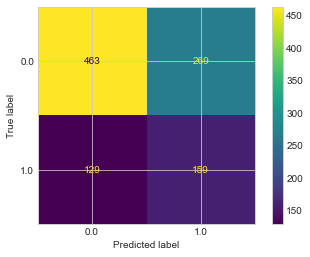

In [162]:
plot_confusion_matrix(smote, x_test, y_test)
plt.show()

# RandomForest

In [163]:

# train model
rfc = RandomForestClassifier(n_estimators=15).fit(x_train, y_train)

# predict on test set
rfc_pred = rfc.predict(x_test)

print("Accuracy: ",accuracy_score(y_test, rfc_pred))

Accuracy:  0.65


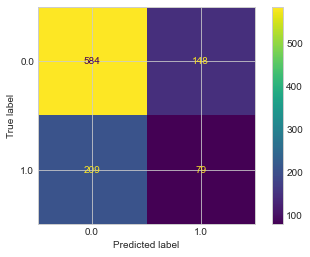

In [164]:
plot_confusion_matrix(rfc, x_test, y_test)
plt.show()

# XGBoost

In [165]:
model = XGBClassifier(random_state=0,learning_rate=0.04)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[12:44:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/subrotosingha/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 69.90%


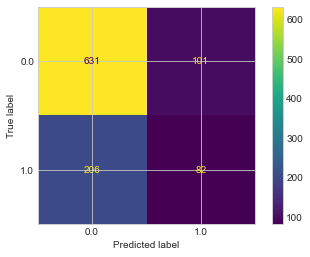

In [166]:
plot_confusion_matrix(model, x_test, y_test)
plt.show()

# Neural Network

In [167]:
input_shape = [x_train.shape[1]]

# model
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(1,activation='sigmoid'),
])

In [168]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_45 (Batc (None, 47)                188       
_________________________________________________________________
dense_51 (Dense)             (None, 512)               24576     
_________________________________________________________________
batch_normalization_46 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_30 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_47 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_31 (Dropout)         (None, 256)             

In [169]:
#ADAM
model.compile(optimizer='ADAM',loss='binary_crossentropy',metrics=['binary_accuracy'])

Epoch 1/200
9/9 [==============================] - 1s 35ms/step - loss: 0.9064 - binary_accuracy: 0.5532 - val_loss: 1.4986 - val_binary_accuracy: 0.7176
Epoch 2/200
9/9 [==============================] - 0s 14ms/step - loss: 0.6947 - binary_accuracy: 0.6591 - val_loss: 1.5760 - val_binary_accuracy: 0.7176
Epoch 3/200
9/9 [==============================] - 0s 15ms/step - loss: 0.6762 - binary_accuracy: 0.6570 - val_loss: 1.1696 - val_binary_accuracy: 0.7176
Epoch 4/200
9/9 [==============================] - 0s 15ms/step - loss: 0.6158 - binary_accuracy: 0.6808 - val_loss: 0.7344 - val_binary_accuracy: 0.7147
Epoch 5/200
9/9 [==============================] - 0s 14ms/step - loss: 0.5978 - binary_accuracy: 0.6968 - val_loss: 1.0023 - val_binary_accuracy: 0.7176
Epoch 6/200
9/9 [==============================] - 0s 15ms/step - loss: 0.5910 - binary_accuracy: 0.7039 - val_loss: 0.7304 - val_binary_accuracy: 0.7157
Epoch 7/200
9/9 [==============================] - 0s 14ms/step - loss: 0.57

<AxesSubplot:title={'center':'Accuracy'}>

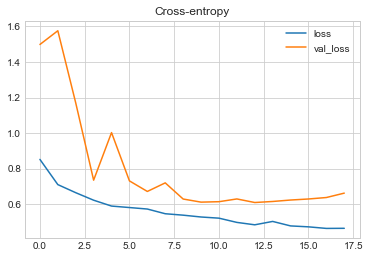

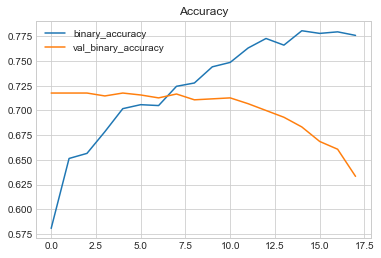

In [170]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

Epoch 1/200
9/9 [==============================] - 1s 35ms/step - loss: 0.9911 - binary_accuracy: 0.5416 - val_loss: 0.6503 - val_binary_accuracy: 0.7157
Epoch 2/200
9/9 [==============================] - 0s 14ms/step - loss: 0.6992 - binary_accuracy: 0.6393 - val_loss: 0.5971 - val_binary_accuracy: 0.7147
Epoch 3/200
9/9 [==============================] - 0s 15ms/step - loss: 0.6755 - binary_accuracy: 0.6508 - val_loss: 0.6285 - val_binary_accuracy: 0.6824
Epoch 4/200
9/9 [==============================] - 0s 16ms/step - loss: 0.6412 - binary_accuracy: 0.6725 - val_loss: 0.6010 - val_binary_accuracy: 0.7157
Epoch 5/200
9/9 [==============================] - 0s 15ms/step - loss: 0.6113 - binary_accuracy: 0.6993 - val_loss: 0.6435 - val_binary_accuracy: 0.7186
Epoch 6/200
9/9 [==============================] - 0s 15ms/step - loss: 0.5968 - binary_accuracy: 0.6990 - val_loss: 0.6374 - val_binary_accuracy: 0.7167
Epoch 7/200
9/9 [==============================] - 0s 15ms/step - loss: 0.58

<AxesSubplot:title={'center':'Accuracy'}>

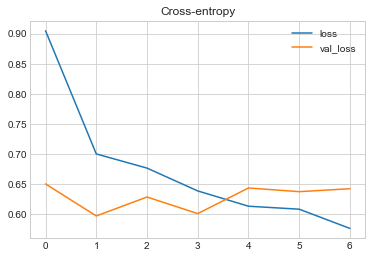

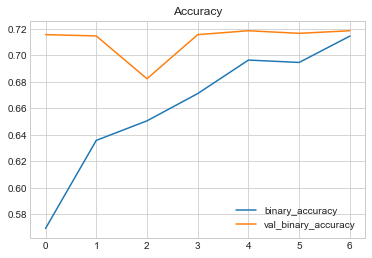

In [171]:
# RMSProp
# model
model1 = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(1,activation='sigmoid'),
])

model1.compile(optimizer='RMSProp',loss='binary_crossentropy',metrics=['binary_accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model1.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

Epoch 1/200
9/9 [==============================] - 1s 37ms/step - loss: 0.9547 - binary_accuracy: 0.5137 - val_loss: 0.6050 - val_binary_accuracy: 0.7020
Epoch 2/200
9/9 [==============================] - 0s 14ms/step - loss: 0.8385 - binary_accuracy: 0.5390 - val_loss: 0.6080 - val_binary_accuracy: 0.7029
Epoch 3/200
9/9 [==============================] - 0s 15ms/step - loss: 0.7911 - binary_accuracy: 0.5621 - val_loss: 0.6152 - val_binary_accuracy: 0.7029
Epoch 4/200
9/9 [==============================] - 0s 15ms/step - loss: 0.8010 - binary_accuracy: 0.5511 - val_loss: 0.6074 - val_binary_accuracy: 0.7088
Epoch 5/200
9/9 [==============================] - 0s 15ms/step - loss: 0.7900 - binary_accuracy: 0.5612 - val_loss: 0.6091 - val_binary_accuracy: 0.7078
Epoch 6/200
9/9 [==============================] - 0s 15ms/step - loss: 0.7639 - binary_accuracy: 0.5710 - val_loss: 0.6060 - val_binary_accuracy: 0.7098


<AxesSubplot:title={'center':'Accuracy'}>

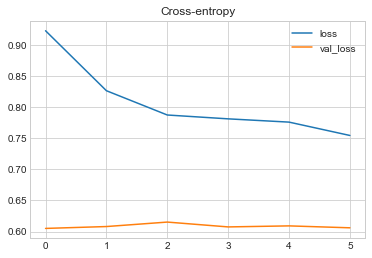

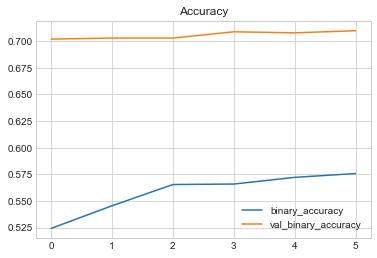

In [172]:
# SGD
# model
model1 = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(1,activation='sigmoid'),
])

model1.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['binary_accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model1.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

# Data Reshape for LSTM,GRU Implementation

In [173]:
x_train = x_train.to_numpy()
x_train=x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4464, 47, 1)

In [174]:
x_test = x_test.to_numpy()
x_test=x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(1020, 47, 1)

# LSTM Model

Link_LSTM: https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

In [175]:
# Importing the Keras libraries and packages for LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow import keras
from tensorflow.keras.layers import concatenate
from tensorflow.keras.activations import swish

In [176]:
inputs = keras.Input(shape=(x_train.shape[1], 1), name="input_layer")

#First block of lstm and dense
#lstm layers
lstm_1 = LSTM(128, return_sequences=True, name="lstm1")(inputs)
lstm_2 = LSTM(64, return_sequences=False, name="lstm2")(lstm_1)
#dense layers
dense_1 = Dense(128, activation="relu", name="dense1")(lstm_2)
dense_2 = Dense(64, activation="relu", name="dense2")(dense_1)
#flat1 = Flatten()(dense_2)

#Second block of lstm and dense
#lstm layers
lstm_3 = LSTM(128, return_sequences=True, name="lstm3")(inputs)
lstm_4 = LSTM(64, return_sequences=False, name="lstm4")(lstm_3)
#dense layers
dense_3 = Dense(128, activation="swish", name="dense3")(lstm_4)
dense_4 = Dense(64, activation="swish", name="dense4")(dense_3)
#flat2 = Flatten()(dense_4)


#concatenate layer
merge = concatenate([dense_2, dense_4])

# interpretation layer
hidden1 = Dense(10, activation='relu')(merge)

#Output layer
outputs = Dense(1, activation='sigmoid', name="output")(hidden1)
model = keras.Model(inputs=inputs, outputs=outputs,name="lstm_model1")

model.summary()

Model: "lstm_model1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 47, 1)]      0                                            
__________________________________________________________________________________________________
lstm1 (LSTM)                    (None, 47, 128)      66560       input_layer[0][0]                
__________________________________________________________________________________________________
lstm3 (LSTM)                    (None, 47, 128)      66560       input_layer[0][0]                
__________________________________________________________________________________________________
lstm2 (LSTM)                    (None, 64)           49408       lstm1[0][0]                      
________________________________________________________________________________________

In [177]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [178]:
# Compiling the LSTM
model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics=['accuracy'])

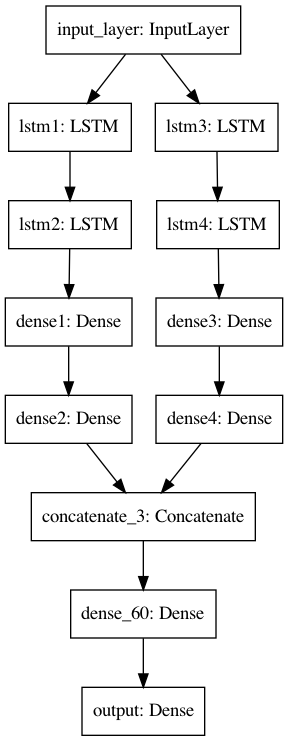

In [179]:
keras.utils.plot_model(model, "my_first_model.png")

In [180]:
# Fitting the LSTM to the Training set
model.fit(x_train, y_train, batch_size = 20, epochs = 20, verbose = 1,validation_data=(x_test, y_test))

Epoch 1/20
224/224 [==============================] - 14s 43ms/step - loss: 0.6959 - accuracy: 0.4968 - val_loss: 0.7085 - val_accuracy: 0.4275
Epoch 2/20
224/224 [==============================] - 8s 36ms/step - loss: 0.6902 - accuracy: 0.5416 - val_loss: 0.6749 - val_accuracy: 0.6216
Epoch 3/20
224/224 [==============================] - 8s 35ms/step - loss: 0.6817 - accuracy: 0.5707 - val_loss: 0.6765 - val_accuracy: 0.6392
Epoch 4/20
224/224 [==============================] - 8s 35ms/step - loss: 0.6751 - accuracy: 0.5854 - val_loss: 0.6489 - val_accuracy: 0.6902
Epoch 5/20
224/224 [==============================] - 8s 35ms/step - loss: 0.6707 - accuracy: 0.5882 - val_loss: 0.6732 - val_accuracy: 0.6363
Epoch 6/20
224/224 [==============================] - 8s 34ms/step - loss: 0.6733 - accuracy: 0.5818 - val_loss: 0.6883 - val_accuracy: 0.5961
Epoch 7/20
224/224 [==============================] - 9s 42ms/step - loss: 0.6670 - accuracy: 0.6056 - val_loss: 0.6423 - val_accuracy: 0.689

In [181]:
opt = tensorflow.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics=['accuracy'])

In [182]:
# Fitting the LSTM to the Training set
model.fit(x_train, y_train, batch_size = 64, epochs = 20, verbose = 1,validation_data=(x_test, y_test))

Epoch 1/20
70/70 [==============================] - 10s 81ms/step - loss: 0.6286 - accuracy: 0.6479 - val_loss: 0.6649 - val_accuracy: 0.6343
Epoch 2/20
70/70 [==============================] - 5s 67ms/step - loss: 0.6106 - accuracy: 0.6652 - val_loss: 0.6657 - val_accuracy: 0.6255
Epoch 3/20
70/70 [==============================] - 5s 71ms/step - loss: 0.5994 - accuracy: 0.6722 - val_loss: 0.6631 - val_accuracy: 0.6275
Epoch 4/20
70/70 [==============================] - 5s 65ms/step - loss: 0.6127 - accuracy: 0.6664 - val_loss: 0.6670 - val_accuracy: 0.6235
Epoch 5/20
70/70 [==============================] - 5s 69ms/step - loss: 0.6095 - accuracy: 0.6663 - val_loss: 0.6666 - val_accuracy: 0.6196
Epoch 6/20
70/70 [==============================] - 5s 65ms/step - loss: 0.6095 - accuracy: 0.6582 - val_loss: 0.6724 - val_accuracy: 0.6186
Epoch 7/20
70/70 [==============================] - 4s 64ms/step - loss: 0.5971 - accuracy: 0.6724 - val_loss: 0.6682 - val_accuracy: 0.6167
Epoch 8/20
7

In [183]:
opt=tensorflow.keras.optimizers.Adagrad(learning_rate=0.0001)
model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics=['accuracy'])

In [184]:
# Fitting the LSTM to the Training set
model.fit(x_train, y_train, batch_size = 64, epochs = 20, verbose = 1,validation_data=(x_test, y_test))

Epoch 1/20
70/70 [==============================] - 12s 88ms/step - loss: 0.5942 - accuracy: 0.6852 - val_loss: 0.6911 - val_accuracy: 0.5941
Epoch 2/20
70/70 [==============================] - 5s 73ms/step - loss: 0.6023 - accuracy: 0.6755 - val_loss: 0.6906 - val_accuracy: 0.5931
Epoch 3/20
70/70 [==============================] - 5s 70ms/step - loss: 0.5918 - accuracy: 0.6831 - val_loss: 0.6902 - val_accuracy: 0.5931
Epoch 4/20
70/70 [==============================] - 5s 66ms/step - loss: 0.5900 - accuracy: 0.6931 - val_loss: 0.6899 - val_accuracy: 0.5951
Epoch 5/20
70/70 [==============================] - 5s 68ms/step - loss: 0.5941 - accuracy: 0.6791 - val_loss: 0.6896 - val_accuracy: 0.5971
Epoch 6/20
70/70 [==============================] - 5s 70ms/step - loss: 0.5893 - accuracy: 0.6891 - val_loss: 0.6894 - val_accuracy: 0.5961
Epoch 7/20
70/70 [==============================] - 5s 75ms/step - loss: 0.5927 - accuracy: 0.6836 - val_loss: 0.6893 - val_accuracy: 0.5951
Epoch 8/20
7

# GRU Model

Link_GRU: https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU

In [185]:
from tensorflow.keras.layers import GRU
from tensorflow.keras.activations import swish

In [186]:
# Initialising the Sequential Model
model1 = Sequential()
# Adding the input layer and the GRU layer
model1.add(GRU(units = 32, activation = 'swish',recurrent_activation='sigmoid',recurrent_dropout=0.02,unroll=False,return_sequences=True, input_shape = (x_train.shape[1], 1)))
# Adding the output layer
model1.add(Dense(units = 1,activation='sigmoid'))

In [187]:
# Compiling the GRU
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

In [188]:
# Fitting the GRU to the Training set
model1.fit(x_train, y_train, batch_size = 20, epochs = 20, verbose = 1,validation_data=(x_test, y_test))

Epoch 1/20
224/224 [==============================] - 6s 21ms/step - loss: 2.4256 - accuracy: 0.4990 - val_loss: 0.7273 - val_accuracy: 0.5662
Epoch 2/20
224/224 [==============================] - 4s 20ms/step - loss: 0.7980 - accuracy: 0.5004 - val_loss: 0.6997 - val_accuracy: 0.5478
Epoch 3/20
224/224 [==============================] - 4s 20ms/step - loss: 0.7524 - accuracy: 0.5031 - val_loss: 0.6858 - val_accuracy: 0.5518
Epoch 4/20
224/224 [==============================] - 4s 19ms/step - loss: 0.7402 - accuracy: 0.5052 - val_loss: 0.6742 - val_accuracy: 0.6204
Epoch 5/20
224/224 [==============================] - 4s 19ms/step - loss: 0.7359 - accuracy: 0.5109 - val_loss: 0.6663 - val_accuracy: 0.6354
Epoch 6/20
224/224 [==============================] - 4s 20ms/step - loss: 0.7213 - accuracy: 0.5113 - val_loss: 0.6994 - val_accuracy: 0.5136
Epoch 7/20
224/224 [==============================] - 4s 20ms/step - loss: 0.7140 - accuracy: 0.5294 - val_loss: 0.7445 - val_accuracy: 0.4308